# Hotel Reservation

## Objective : Predicting whether the customer is going to cancel the reservation or not. 

#### Data science solution:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('Hotel Reservations.csv')

In [3]:
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [4]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [5]:
data.shape

(36275, 19)

In [6]:
data.isnull()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
36271,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
36272,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
36273,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
missing_value=["N/a","na",np.nan]
data=pd.read_csv('Hotel Reservations.csv',na_values=missing_value)

In [9]:
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [10]:
data.isnull().any()

Booking_ID                              False
no_of_adults                            False
no_of_children                          False
no_of_weekend_nights                    False
no_of_week_nights                       False
type_of_meal_plan                       False
required_car_parking_space              False
room_type_reserved                      False
lead_time                               False
arrival_year                            False
arrival_month                           False
arrival_date                            False
market_segment_type                     False
repeated_guest                          False
no_of_previous_cancellations            False
no_of_previous_bookings_not_canceled    False
avg_price_per_room                      False
no_of_special_requests                  False
booking_status                          False
dtype: bool

## Cleaned DataSet

<AxesSubplot: >

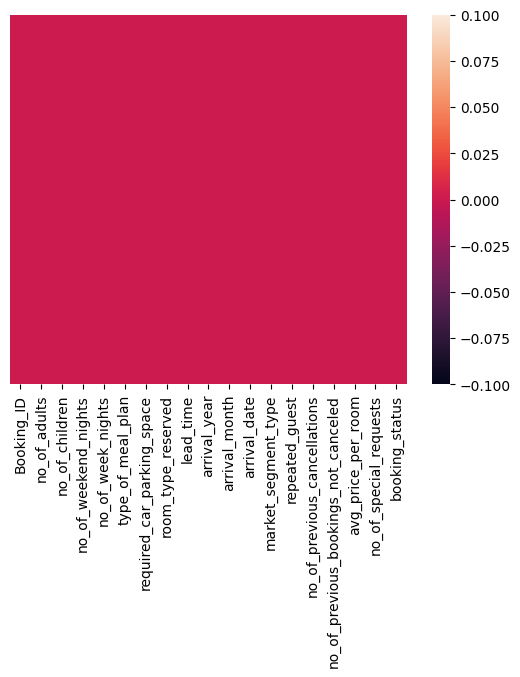

In [11]:
sns.heatmap(data.isnull(),yticklabels=False)

In [12]:
y=data['booking_status'].copy()

<AxesSubplot: xlabel='booking_status', ylabel='count'>

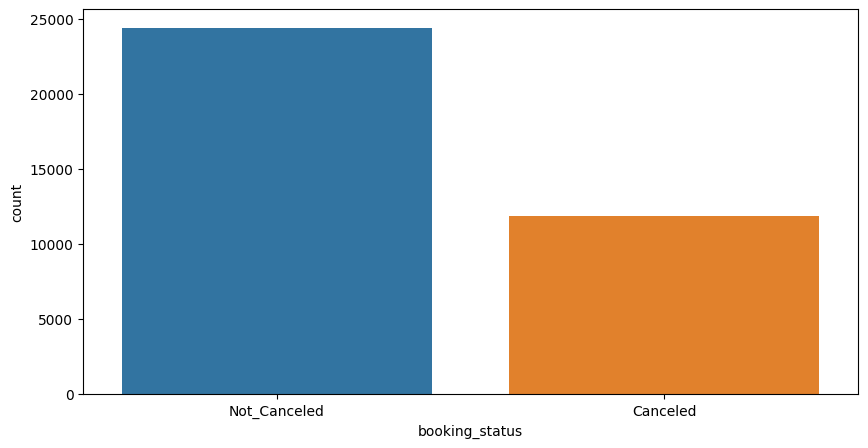

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(data = data  ,x= 'booking_status')

In [14]:
feature_cols = ['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'type_of_meal_plan',
 'required_car_parking_space',
 'room_type_reserved',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'market_segment_type',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']
x = data[feature_cols]

In [15]:
y=data.iloc[:,18]

In [16]:
labelencoder_x=LabelEncoder()

In [17]:
x=x.apply(LabelEncoder().fit_transform)

In [18]:
x

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,0,0,0,224,0,9,1,3,0,0,0,343,0
1,2,0,2,3,3,0,0,5,1,10,5,4,0,0,0,1912,1
2,1,0,2,1,0,0,0,1,1,1,27,4,0,0,0,238,0
3,2,0,0,2,0,0,0,211,1,4,19,4,0,0,0,1645,0
4,2,0,1,1,3,0,0,48,1,3,10,4,0,0,0,1435,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,0,3,85,1,7,2,4,0,0,0,3403,1
36271,2,0,1,3,0,0,0,228,1,9,16,4,0,0,0,1291,2
36272,2,0,2,6,0,0,0,148,1,6,0,4,0,0,0,1589,2
36273,2,0,0,3,3,0,0,63,1,3,20,4,0,0,0,1435,0


## Fitting into Tree Model

In [19]:
#splitting data in test and train
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [20]:
#Fitting data into tree
clf=DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=10,random_state=0)
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10, random_state=0)

In [21]:
y_predicted=clf.predict(X_test)

In [22]:
accuracy_score(y_test,y_predicted)*100

82.11890103831664

### Confusion Matrix

In [23]:
confusion_matrix(y_test,y_predicted)

array([[2449, 1073],
       [ 873, 6488]], dtype=int64)

## Plotting Decision Tree

In [24]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

In [25]:
dot_data=StringIO()

In [26]:
export_graphviz(clf,out_file=dot_data,filled=True,rounded=True,special_characters=True)

In [27]:
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())

## Decision Tree

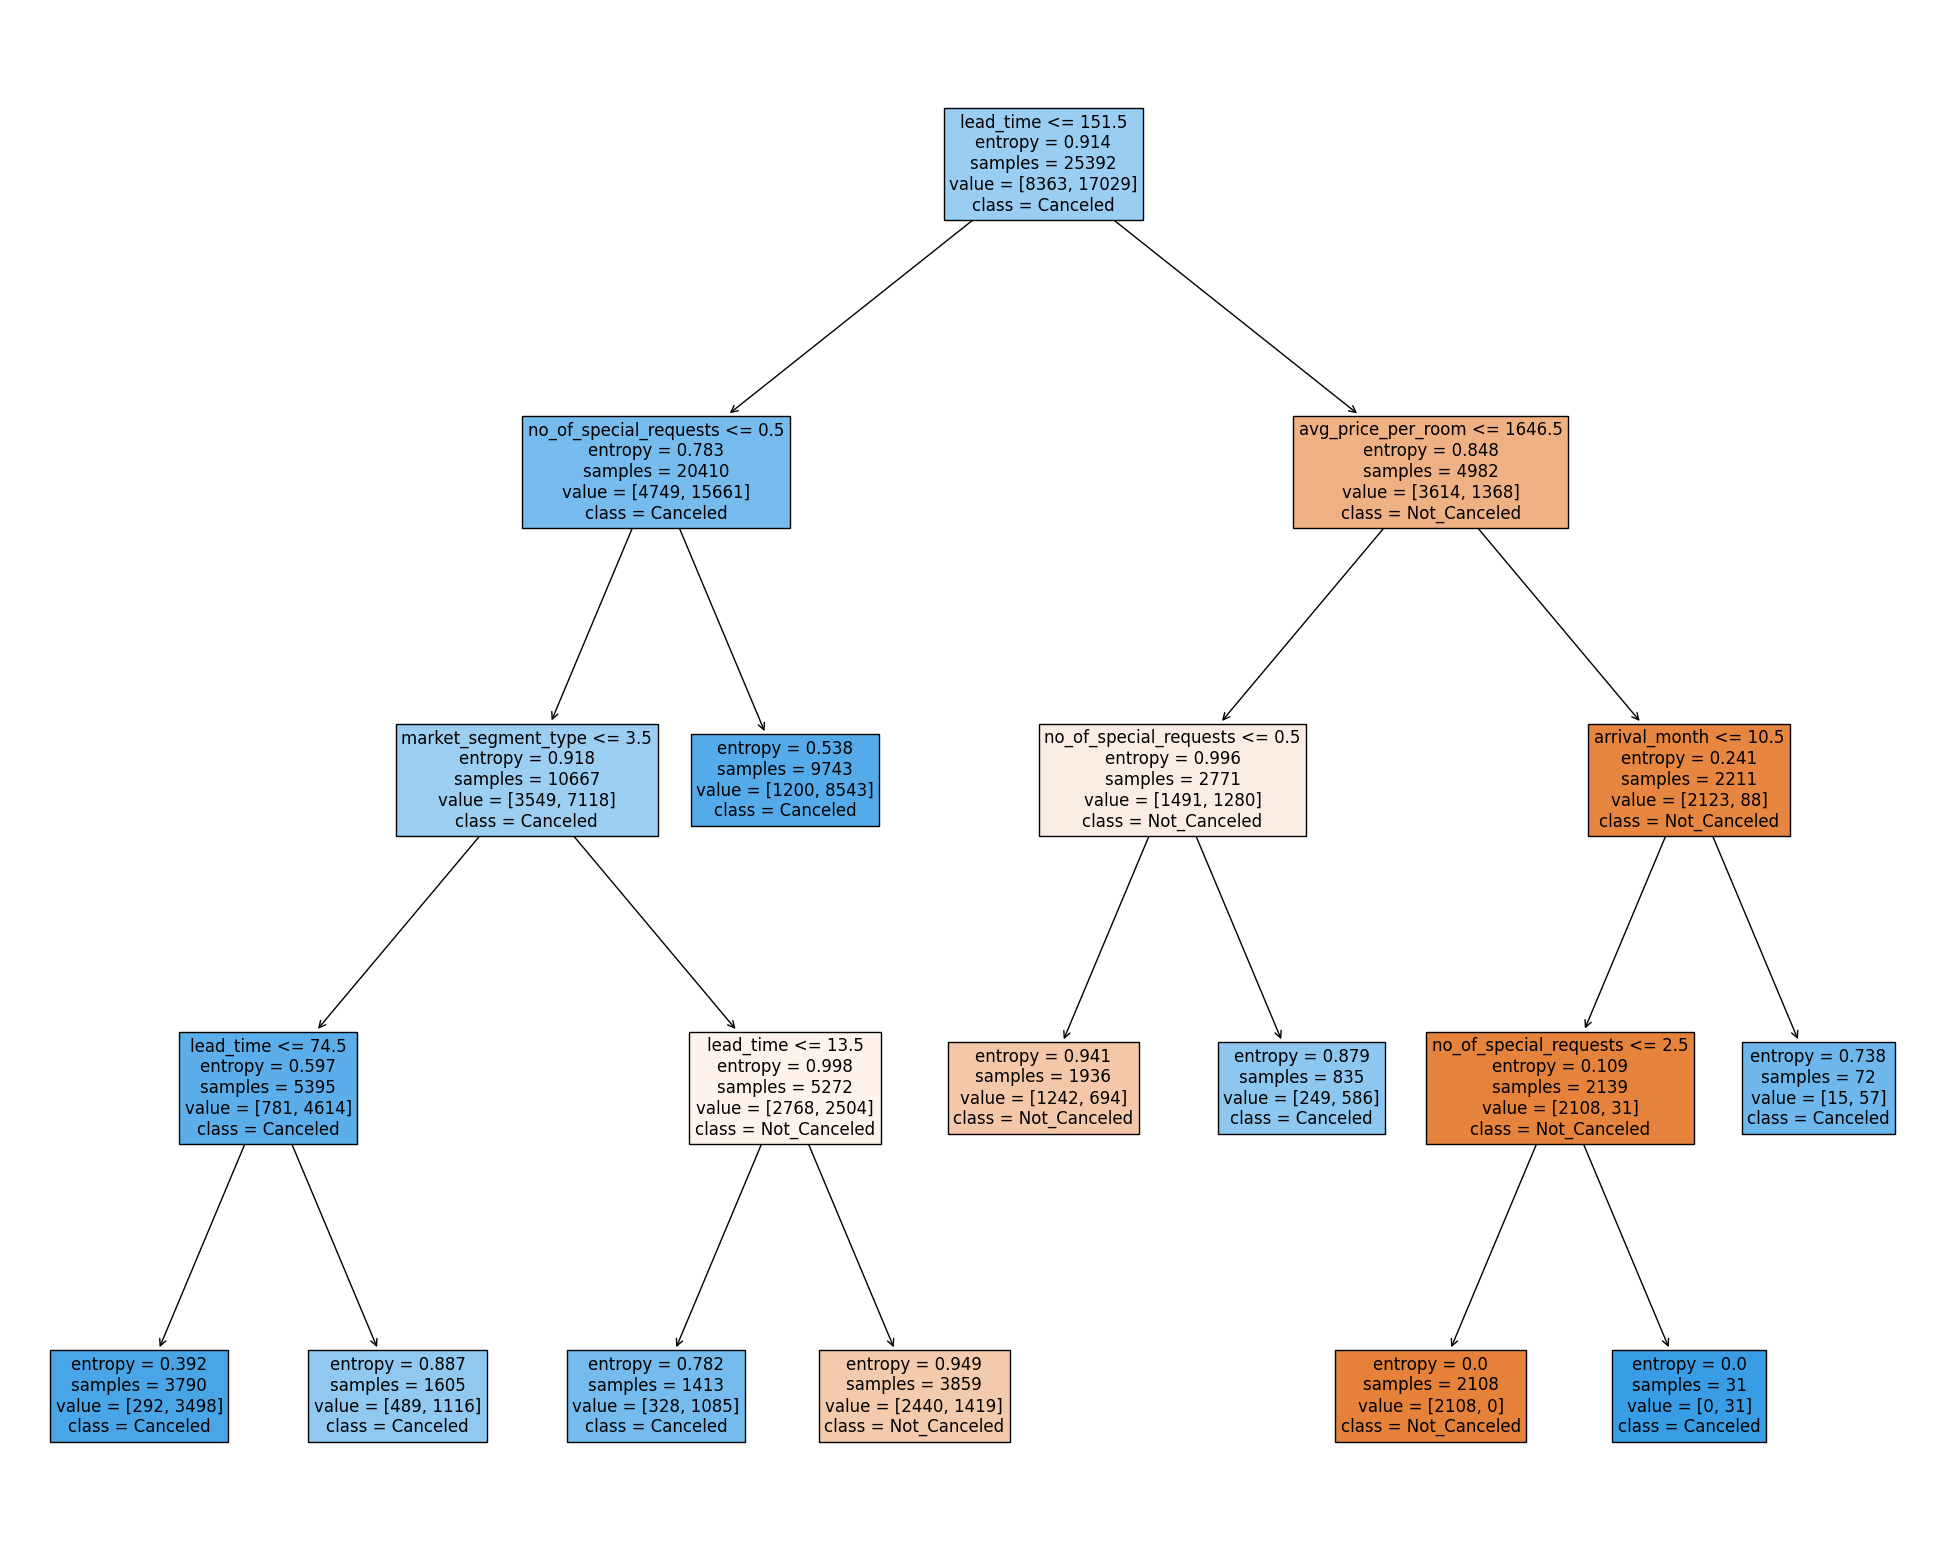

In [28]:
from sklearn import tree
fig=plt.figure(figsize=(25,20))
_=tree.plot_tree(clf,feature_names=feature_cols,class_names={0:'Not_Canceled',1:'Canceled'},filled=True,fontsize=12)

## Accuracy of the model

In [30]:
accuracy_score(y_test,y_predicted)*100

82.11890103831664

## Conclusion

### Decision Tree predicts whether a customer is going to cancel the reservation or not by classifying them into 2 classes - Cancel and Not Cancel. It has an accuracy of 82%.